In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [30]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (1).csv


In [31]:
df=pd.read_csv('data.csv')

In [32]:
# print the first 5 rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
df1=df.drop(['id','Unnamed: 32'],axis=1)

In [34]:
# checking the distribution of Target Varibale
df1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

([<matplotlib.patches.Wedge at 0x7a6e1be61210>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'Benign'),
  Text(0.428654605109445, -1.013042560566172, 'Malignant')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

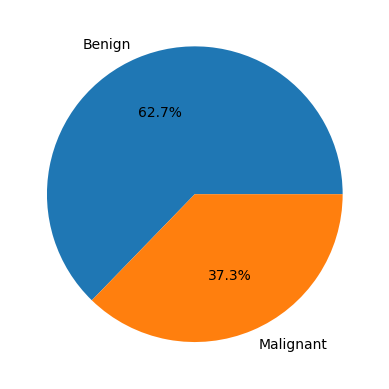

In [35]:
import matplotlib.pyplot as plt

labels = 'Benign','Malignant'
sizes = [357,212]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [36]:
def normalise_row(row):
    if row['diagnosis'] == 'M':
      return 0
    else:
      return 1

# 1 is coded as Benign and 0 as Malignant
df1['label'] = df1.apply(lambda row : normalise_row(row), axis=1)

In [37]:
df2=df1.drop('diagnosis',axis=1)

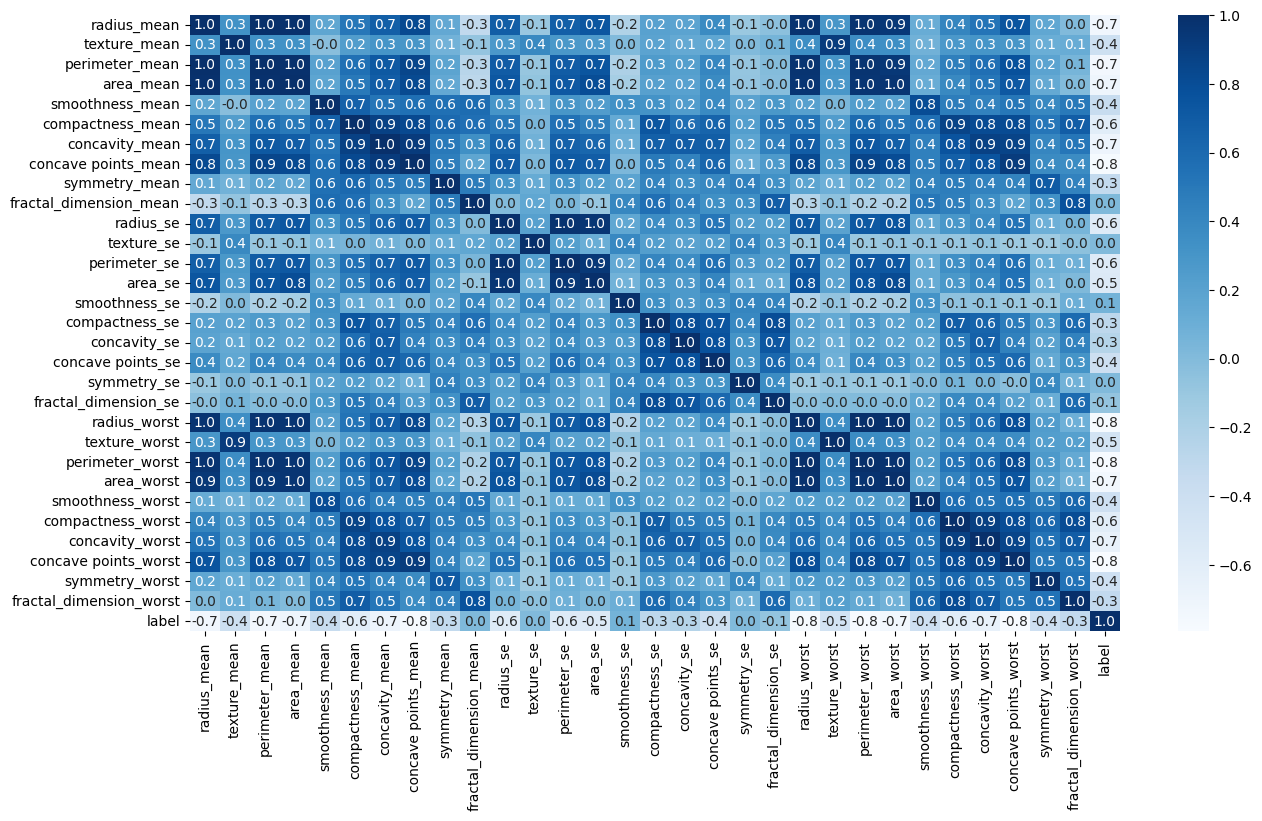

In [38]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df2.corr(),cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.show()

<ipython-input-40-27be530e3982>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])
<ipython-input-40-27be530e3982>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])
<ipython-input-40-27be530e3982>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in

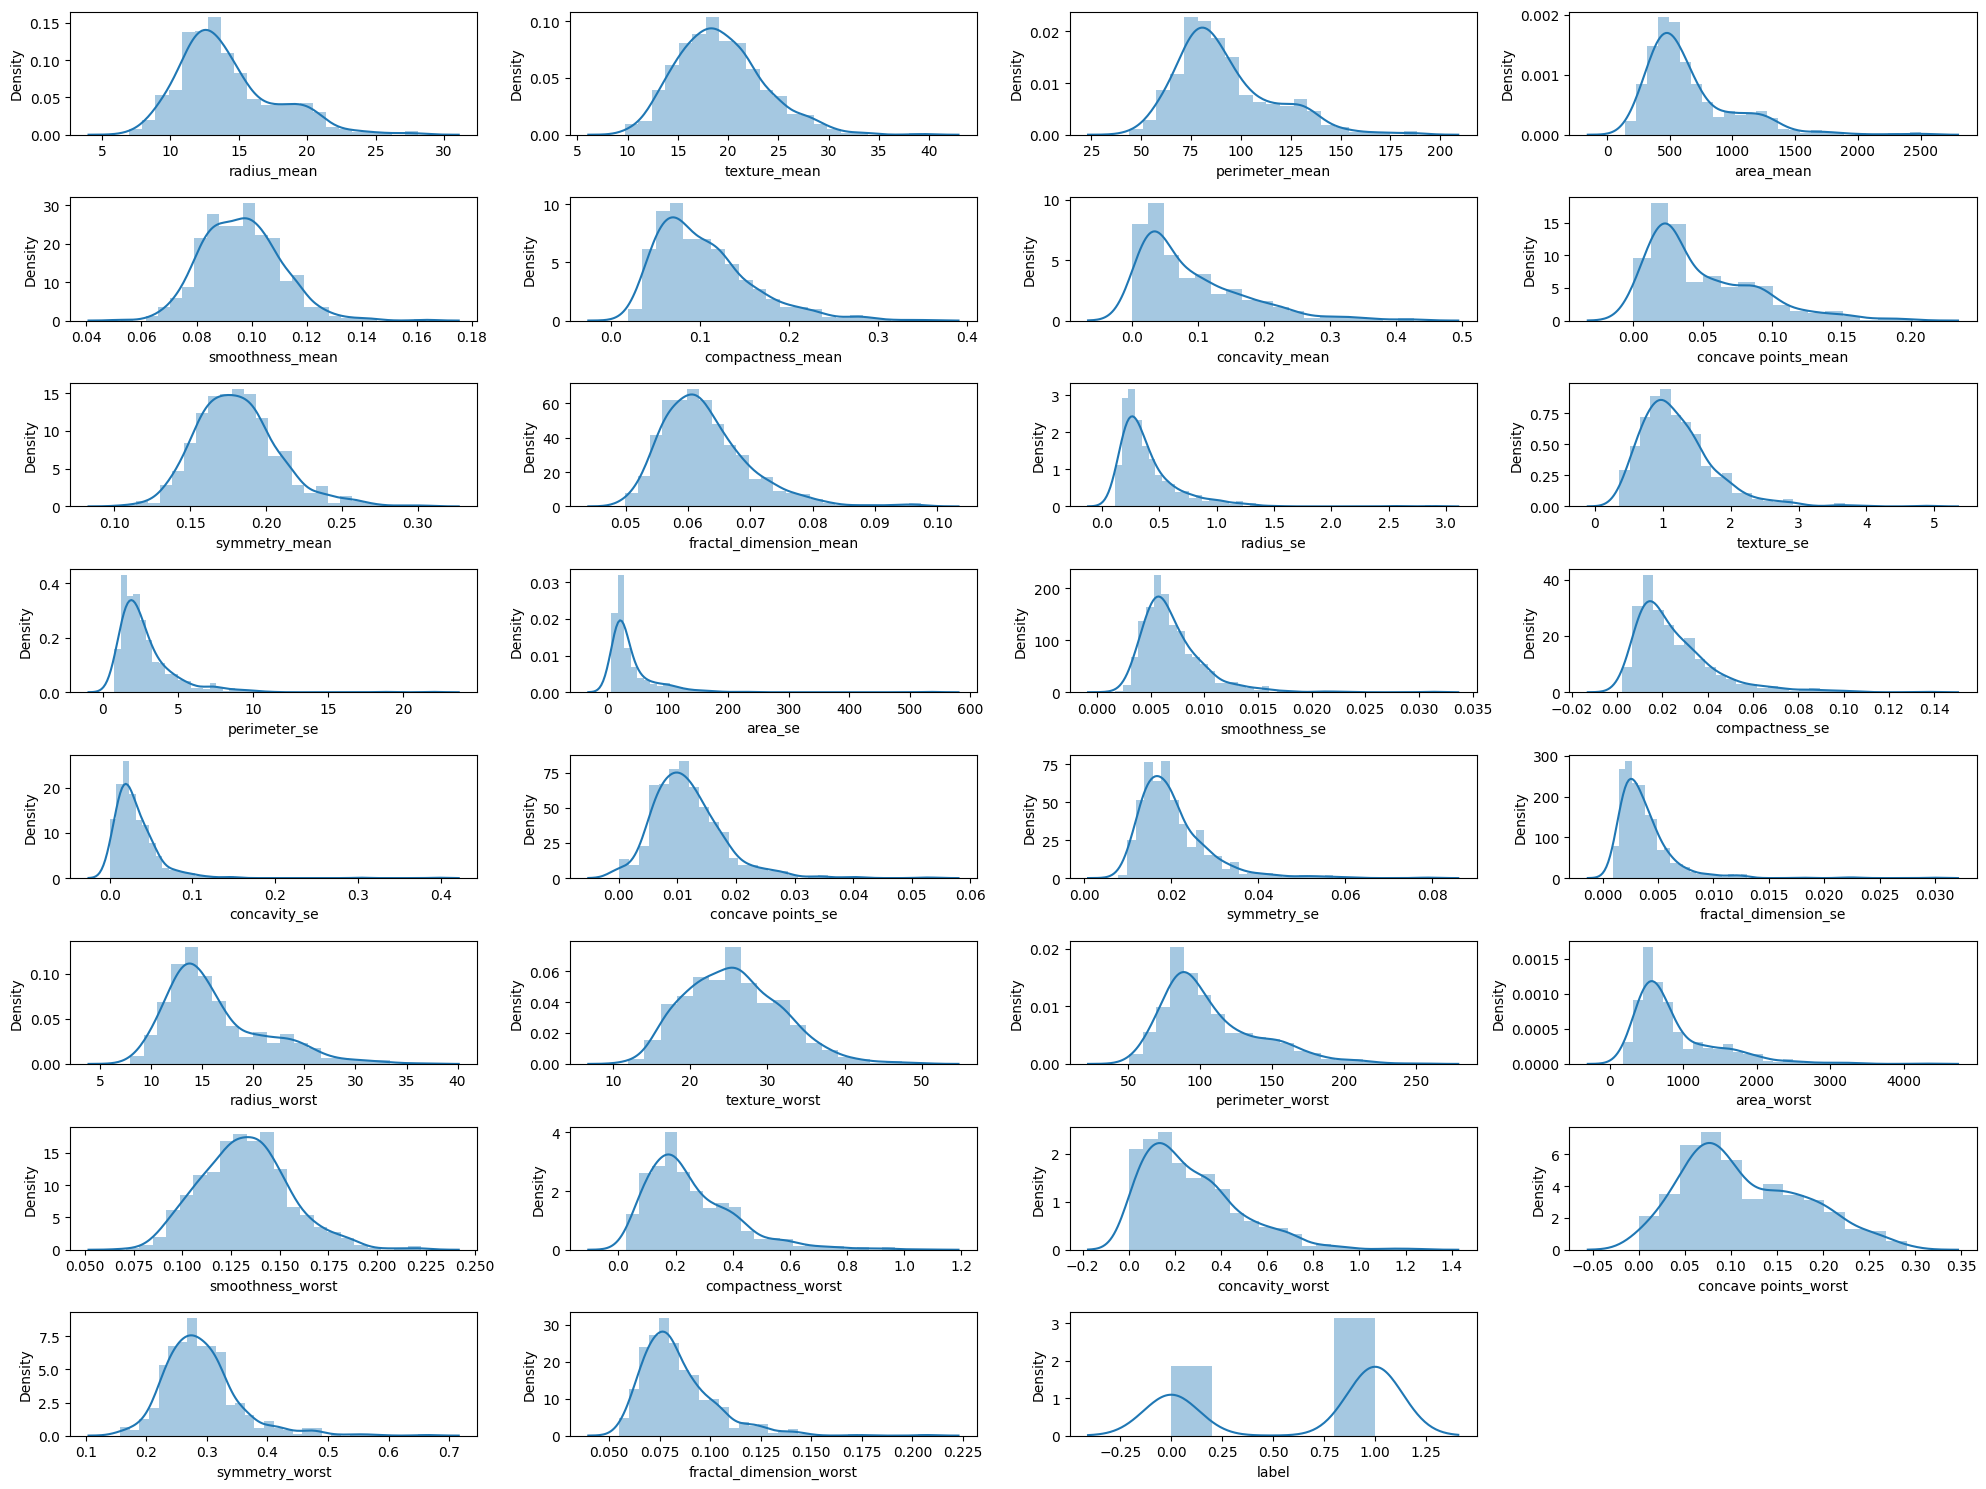

In [40]:
# checking numerical features distribution
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']
plt.figure(figsize = (20,15))
plotnumber = 1

for column in num_cols:
    if plotnumber <=31:
        ax = plt.subplot(8,4, plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()